<a href="https://colab.research.google.com/github/negovanovic-e/automatska-kategorizacija-proizvoda/blob/main/02_priprema_podataka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
import os

uploaded = files.upload()

# Učitaj podatke
df = pd.read_csv('products.csv')

# Čišćenje naziva stupaca
df.columns = df.columns.str.strip()
print("Dimenzije podataka:", df.shape)

Saving products.csv to products.csv
Dimenzije podataka: (35311, 8)


In [3]:
# Rješavanje nedostajućih vrijednosti
print("NEDOSTAJUĆE VRIJEDNOSTI PRIJE ČIŠĆENJA:")
print(df.isnull().sum())

# Ukloni redove gdje nedostaju ključni podaci
df_clean = df.dropna(subset=['Product Title', 'Category Label'])
print(f"\n Nakon čišćenja: {len(df_clean)} proizvoda (prije {len(df)})")

NEDOSTAJUĆE VRIJEDNOSTI PRIJE ČIŠĆENJA:
product ID           0
Product Title      172
Merchant ID          0
Category Label      44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
Listing Date        59
dtype: int64

 Nakon čišćenja: 35096 proizvoda (prije 35311)


In [4]:
# Preprocesiranje teksta
def preprocess_text(text):
    """Funkcija za preprocesiranje teksta naziva proizvoda"""
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Primijeni preprocesiranje
df_clean['cleaned_title'] = df_clean['Product Title'].apply(preprocess_text)

/tmp/ipython-input-2858924842.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cleaned_title'] = df_clean['Product Title'].apply(preprocess_text)


In [5]:
# Inženjering značajki
df_clean['title_length'] = df_clean['cleaned_title'].apply(len)
df_clean['word_count'] = df_clean['cleaned_title'].apply(lambda x: len(x.split()))

print("\nINŽENJERING ZNAČAJKI:")
print(f"Prosječna dužina naslova: {df_clean['title_length'].mean():.2f}")
print(f"Prosječan broj riječi: {df_clean['word_count'].mean():.2f}")


INŽENJERING ZNAČAJKI:
Prosječna dužina naslova: 45.29
Prosječan broj riječi: 7.96


/tmp/ipython-input-2609122232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['title_length'] = df_clean['cleaned_title'].apply(len)
/tmp/ipython-input-2609122232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['word_count'] = df_clean['cleaned_title'].apply(lambda x: len(x.split()))


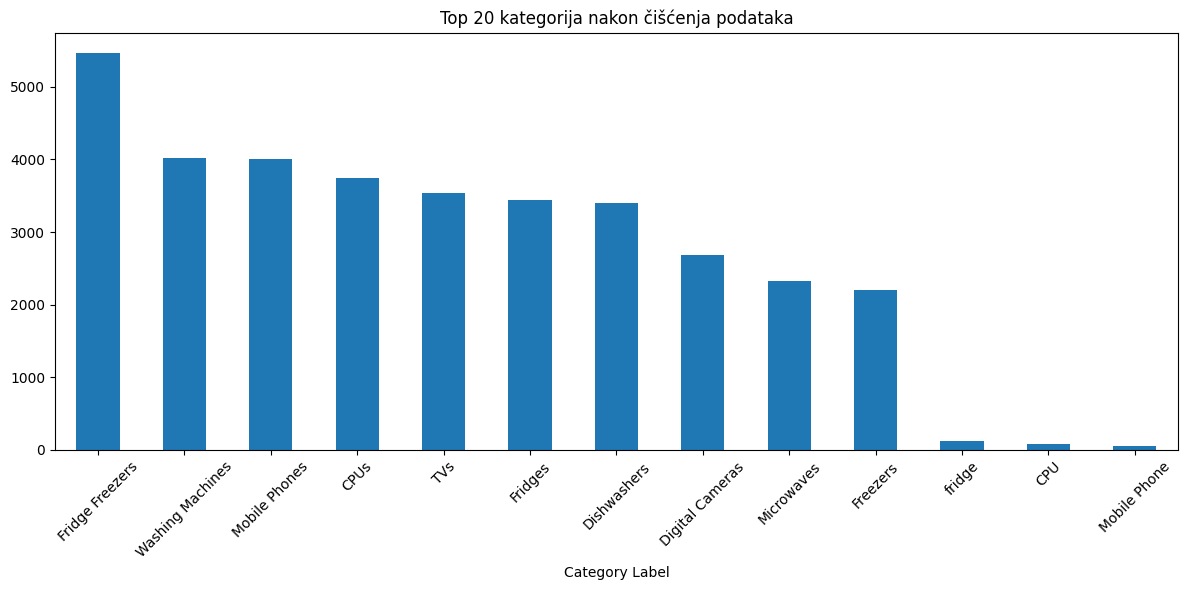

In [6]:
# Analiza kategorija nakon čišćenja
plt.figure(figsize=(12, 6))
category_counts = df_clean['Category Label'].value_counts()
category_counts.head(20).plot(kind='bar')
plt.title('Top 20 kategorija nakon čišćenja podataka')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Spremanje pripremljenih podataka
df_clean.to_csv('products_clean.csv', index=False)
print("Očišćeni podaci spremljeni kao 'products_clean.csv'")

print("Priprema podataka završena!")

Očišćeni podaci spremljeni kao 'products_clean.csv'
Priprema podataka završena!
